In [1]:
import pandas as pd
import numpy as np
from collections import Counter

In [9]:
# binarynoloc = pd.read_pickle('binarynoloc.pkl')
# original=pd.read_pickle('original.pkl')
# toanalize=np.load('patterngt1000.npy')
# forkmer=np.load('forkmer.npy')
kmers=np.load('kmersresult.npy')
df=pd.read_pickle('df.pkl')

In [11]:
len(kmers[0])

197

In [14]:
colnum=5
for i in list(range(31,49))+[50,51,61]:
    dff=pd.read_pickle(str(i)+'.pkl')
    df[str(colnum)]=dff[3]
    colnum+=1

In [47]:
df.columns=list(range(0,26))

In [67]:
for column in df:
    if column>=3:
        df[column]=df[column].astype('int8')

In [83]:
# remove all rows without enhancers
select=[]
i=0
for index, row in df.iterrows():
    i+=1
    select.append(23 in row.values)
    if i%1000000==0: print(i)
        
#     if any(df.iloc[rownum,:].isin(enhancer)):
#         select.append((True)
#     else:
#         select.append(False)

1000000
2000000
3000000
4000000
5000000
6000000
7000000
8000000
9000000
10000000
11000000
12000000
13000000


In [100]:
dff=df[select]

In [101]:
for i in dff.index:
    for j in list(range(3,26)):
        if dff.at[i,j]==23:
            dff.at[i, j] = 1
        else:
            dff.at[i, j] = 0

In [112]:
duprows=dfff.groupby(dfff.columns.tolist()).apply(lambda x: tuple(x.index)).tolist()

In [119]:
toanalize=[]
for i in duprows:
    if len(i)>1000: toanalize.append(i)
len(toanalize)

64

In [5]:
len(toanalize)

64

In [10]:
forkmer=[]
for pattern in toanalize:
    forkmer=forkmer+list(pattern)
print(forkmer[:5])

[5698, 8308, 41286, 49650, 55083]


In [4]:
kmerposition=original.iloc[:,0:3]
kmerposition=kmerposition.loc[forkmer]

In [17]:
np.savetxt(r'kmerposition.txt', kmerposition.values,fmt='%s %s %s', delimiter="\t")

In [5]:
f = open('kmeroutput')
tokmer = f.readlines()
f.close()

In [6]:
len(tokmer)

2268075

In [7]:
for i in range(len(tokmer)):
    tokmer[i]=tokmer[i][:-1]

In [9]:
def chunks(l,n):
    for i in range(0,len(l),n):
        yield l[i:i+n]

In [10]:
totokmer=list(chunks(tokmer,5))

In [11]:
def find_kmers(string, k):
    localkmers = []
    n = len(string)
    for i in range(0, n-k+1):
        localkmers.append(string[i:i+k])
    return localkmers

In [12]:
kmers=[]
for chunks in totokmer:
    string=''.join(chunks[1:5])
    kmers.append(find_kmers(string,4))

In [ ]:
np.save('kmersresult.npy',kmers)

In [13]:
import itertools
keywords = [''.join(i) for i in itertools.product(['A','C','T','G'], repeat = 4)]

In [14]:
len(keywords)

256

In [12]:
df.drop(list(df)[256:],inplace=True,axis=1)

In [19]:
originalindex['pattern']=-1

In [18]:
originalindex=original.loc[forkmer]

In [21]:
i=0
for pattern in toanalize:
    for rownum in pattern:
        originalindex.set_value(rownum,'pattern',int(i))
    i+=1
    if i%5==0:
        print(i)

/Users/ppht/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  after removing the cwd from sys.path.


5
10
15
20
25
30
35
40
45
50
55
60


In [50]:
df.to_pickle('df.pkl')

In [48]:
df['pattern']=df['pattern']+2

In [53]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import accuracy_score
import copy
from sklearn.metrics import roc_auc_score
import numpy as np
import pandas as pd
import random

LRmodel=[]
LRscore=[]
df=pd.read_pickle('df.pkl')
for i in [3]:
    dff=copy.deepcopy(df)
    dff.loc[dff.pattern==i,'pattern']=1
    dff.loc[dff.pattern!=1, 'pattern'] = 0
    one_index=dff.index[dff['pattern'] == 1].tolist()
    random.shuffle(one_index)
    zero_index=dff.index[dff['pattern'] == 0].tolist()
    random.shuffle(zero_index)
    breaker=int(len(one_index)*0.8)
    train_index=np.asarray(one_index[:breaker])
    train_index=np.append(train_index,np.asarray(zero_index[:breaker]))
    test_index=np.asarray(one_index[breaker:])
    test_index=np.append(test_index,np.asarray(zero_index[breaker:len(one_index)]))
    
    x_train=dff.loc[train_index].as_matrix(columns=list(dff)[:256])
    x_test=dff.loc[test_index].as_matrix(columns=list(dff)[:256])
    y_train=dff.loc[train_index].as_matrix(columns=['pattern'])
    y_test=dff.loc[test_index].as_matrix(columns=['pattern'])

    # perform logistic regression

    log_reg=LogisticRegressionCV(cv=5,solver='liblinear',penalty='l1',n_jobs=-1,max_iter=1000)
    log_reg.fit(x_train,y_train.ravel())
     
    LRmodel.append(log_reg)
    
    y_score=log_reg.decision_function(x_test)
    
    y_prob=log_reg.predict_proba(x_test)
    
    score=roc_auc_score(y_test,y_score)
    
    LRscore.append(score)

    print(i,score)
    del dff
LRscore=np.asarray(LRscore)
LRmodel=np.asarray(LRmodel)
np.save('LRscore.npy',LRscore)
np.save('LRmodel.npy',LRmodel)

KeyboardInterrupt: 

In [3]:
import numpy as np
from sklearn.metrics import accuracy_score
import copy
from sklearn.metrics import roc_auc_score
import pandas as pd
import random
from sklearn import svm

SVCmodel=[]
SVCscore=[]
df=pd.read_pickle('df.pkl')
for i in [2]:
    dff=copy.deepcopy(df)
    dff.loc[dff.pattern==i,'pattern']=1
    dff.loc[dff.pattern!=1, 'pattern'] = 0
    one_index=dff.index[dff['pattern'] == 1].tolist()
    random.shuffle(one_index)
    zero_index=dff.index[dff['pattern'] == 0].tolist()
    random.shuffle(zero_index)
    breaker=int(len(one_index)*0.8)
    train_index=np.asarray(one_index[:breaker])
    train_index=np.append(train_index,np.asarray(zero_index[:breaker]))
    test_index=np.asarray(one_index[breaker:])
    test_index=np.append(test_index,np.asarray(zero_index[breaker:len(one_index)]))
    
    x_train=dff.loc[train_index].as_matrix(columns=list(dff)[:256])
    x_test=dff.loc[test_index].as_matrix(columns=list(dff)[:256])
    y_train=dff.loc[train_index].as_matrix(columns=['pattern'])
    y_test=dff.loc[test_index].as_matrix(columns=['pattern'])

    svm=svm.SVC()
    svm.fit(x_train,y_train.ravel())
    
    SVCmodel.append(svm)
    score=roc_auc_score(y_test,svm.predict(x_test))
    SVCscore.append(score)
    
    print(i,score)
    
SVCscore=np.asarray(SVCscore)
SVCmodel=np.asarray(SVCmodel)
np.save('SVCscore.npy',SVCscore)
np.save('SVCmodel.npy',SVCmodel)

2 0.7659574468085106


In [25]:
import numpy as np
import torch
import torch.nn as nn
from torch.autograd import Variable
import torch.utils.data as Data
import torchvision
import matplotlib.pyplot as plt
import torch.utils.data as Data
from random import shuffle
import copy


df=pd.read_pickle('df.pkl')
for i in [3]:
    dff=copy.deepcopy(df)
    dff.loc[dff.pattern==i,'pattern']=1
    dff.loc[dff.pattern!=1, 'pattern'] = 0
    one_index=dff.index[dff['pattern'] == 1].tolist()
    shuffle(one_index)
    zero_index=dff.index[dff['pattern'] == 0].tolist()
    shuffle(zero_index)
    breaker=int(len(one_index)*0.8)
    train_index=np.asarray(one_index[:breaker])
    train_index=np.append(train_index,np.asarray(zero_index[:breaker]))
    test_index=np.asarray(one_index[breaker:])
    test_index=np.append(test_index,np.asarray(zero_index[breaker:len(one_index)]))
    
    x_train=dff.loc[train_index].as_matrix(columns=list(dff)[:256])
    x_test=dff.loc[test_index].as_matrix(columns=list(dff)[:256])
    y_train=dff.loc[train_index].as_matrix(columns=['pattern'])
    y_test=dff.loc[test_index].as_matrix(columns=['pattern'])

x_train=torch.Tensor(x_train.astype(int)).unsqueeze(1)
x_test=Variable(torch.Tensor(x_test.astype(int)).unsqueeze(1))
y_train=torch.Tensor(y_train.astype(float)).flatten()
y_test=torch.Tensor(y_test.astype(float)).flatten().long()

print(type(x_train),type(x_test),type(y_train),type(y_test))


import torch.utils.data as data_utils

train = data_utils.TensorDataset(x_train, y_train)
train_loader = data_utils.DataLoader(train, batch_size=10, shuffle=True,num_workers=2)


<class 'torch.Tensor'> <class 'torch.Tensor'> <class 'torch.Tensor'> <class 'torch.Tensor'>


In [26]:
# CNN

# Hyper Parameters
EPOCH = 1           # train the training data 3 times
LR = 0.001              # learning rate

class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Sequential(  # input shape (1, 256)
            nn.Conv1d(
                in_channels=1,      # input height
                out_channels=16,    # n_filters
                kernel_size=1,      # filter size
                stride=1,           # filter movement/step
                padding=0      
            ), #(16,256)
            nn.ReLU(),    
            nn.MaxPool1d(2), #(16,128)
        )
        self.conv2 = nn.Sequential(  
            nn.Conv1d(16,32,1,1,0), #(32,128)
            nn.ReLU(),  
            nn.MaxPool1d(2), #(32,64)
        )
        self.out = nn.Linear(32*64,2)   

    def forward(self, x):
        x = self.conv1(x)
        x = self.conv2(x)
        x = x.view(x.size(0), -1)   
        output = self.out(x)
        return output,x



cnn = CNN()
print(cnn)  # net architecture

optimizer = torch.optim.Adam(cnn.parameters(), lr=LR)   # optimize all cnn parameters
loss_func = nn.CrossEntropyLoss()                       # the target label is not one-hotted


# training and testing
for epoch in range(EPOCH):
    for step, (x, y) in enumerate(train_loader):   # gives batch data, normalize x when iterate train_loader
        b_x = Variable(x)   # batch x
        b_y = Variable(y.long())   # batch y

        output = cnn(b_x)[0]               # cnn output
        loss = loss_func(output, b_y)   # cross entropy loss
        optimizer.zero_grad()           # clear gradients for this training step
        loss.backward()                 # backpropagation, compute gradients
        optimizer.step()                # apply gradients

        if step % 100 == 0:
            test_output, last_layer = cnn(x_test)
            y_pred = torch.max(test_output, 1)[1].data.squeeze()
            accuracy = (y_pred == y_test).sum().item() / float(y_test.size(0))
            print('Epoch: ', epoch, '| train loss: %.4f' % loss.data[0], '| test accuracy: %.2f' % accuracy)

# print 10 predictions from test data
test_output, _ = cnn(x_test)
pred_y = torch.max(test_output, 1)[1].data.numpy().squeeze()
print(pred_y, 'prediction number')
print(y_test.numpy(), 'real number')

CNN(
  (conv1): Sequential(
    (0): Conv1d(1, 16, kernel_size=(1,), stride=(1,))
    (1): ReLU()
    (2): MaxPool1d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv2): Sequential(
    (0): Conv1d(16, 32, kernel_size=(1,), stride=(1,))
    (1): ReLU()
    (2): MaxPool1d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (out): Linear(in_features=2048, out_features=2, bias=True)
)


/Users/ppht/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:60: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number


Epoch:  0 | train loss: 0.6612 | test accuracy: 0.50
Epoch:  0 | train loss: 0.6983 | test accuracy: 0.51
Epoch:  0 | train loss: 0.6552 | test accuracy: 0.52
Epoch:  0 | train loss: 0.6840 | test accuracy: 0.53
Epoch:  0 | train loss: 0.6673 | test accuracy: 0.50
Epoch:  0 | train loss: 0.7133 | test accuracy: 0.52
Epoch:  0 | train loss: 0.6944 | test accuracy: 0.50
Epoch:  0 | train loss: 0.6998 | test accuracy: 0.50
Epoch:  0 | train loss: 0.6833 | test accuracy: 0.52
Epoch:  0 | train loss: 0.6990 | test accuracy: 0.51
Epoch:  0 | train loss: 0.6843 | test accuracy: 0.52
Epoch:  0 | train loss: 0.6818 | test accuracy: 0.51
Epoch:  0 | train loss: 0.7196 | test accuracy: 0.53
Epoch:  0 | train loss: 0.7009 | test accuracy: 0.52
Epoch:  0 | train loss: 0.6600 | test accuracy: 0.52
Epoch:  0 | train loss: 0.6998 | test accuracy: 0.53
Epoch:  0 | train loss: 0.7160 | test accuracy: 0.51
Epoch:  0 | train loss: 0.6882 | test accuracy: 0.51
Epoch:  0 | train loss: 0.6488 | test accuracy

In [4]:
rfscore=np.load('RFscore.npy')

In [5]:
rfscore

array([0.75886525, 0.51786766, 0.53751031, 0.50443853, 0.50478796,
       0.53220339, 0.58340993, 0.50401606, 0.50317662, 0.58832808,
       0.52912621, 0.53345353, 0.56218487, 0.53256303, 0.56721698,
       0.55958549, 0.56679389, 0.50254381, 0.57264957, 0.59722222,
       0.59180918, 0.58417085, 0.53762414, 0.57525084, 0.5423341 ,
       0.53506601, 0.54029304, 0.53658537, 0.54509804, 0.56725469,
       0.50499844, 0.50543288, 0.6205036 , 0.50412537, 0.57866667,
       0.59803922, 0.60416667, 0.53646833, 0.55064935, 0.58043478,
       0.61506276, 0.62740385, 0.51276245, 0.5849359 , 0.59508197,
       0.63139932, 0.71759259, 0.63653137, 0.542     , 0.53271028,
       0.51286174, 0.61333333, 0.5866426 , 0.5731143 , 0.51831502,
       0.61152416, 0.56283422, 0.61068702, 0.56640625, 0.51569507,
       0.60841655, 0.64215686, 0.62433155, 0.62408088])

In [10]:
import matplotlib.pyplot as plt

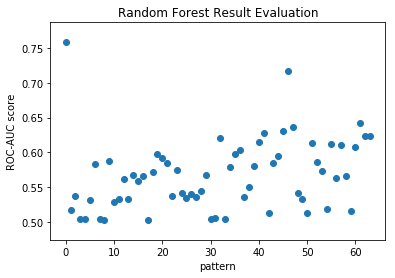

In [15]:
plt.scatter(list(range(len(rfscore))),rfscore)
plt.xlabel("pattern")
plt.ylabel("ROC-AUC score")
plt.title('Random Forest Result Evaluation')
plt.savefig('RFfinal.png')
plt.show()


In [17]:
import sklearn
sklearn.__version__

'0.19.1'

In [19]:
import torch
print(torch.__version__)

0.4.1


In [21]:
import matplotlib

In [22]:
matplotlib.__version__

'2.2.2'